In [1]:
#make_blobs pra criar uma base de teste

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns


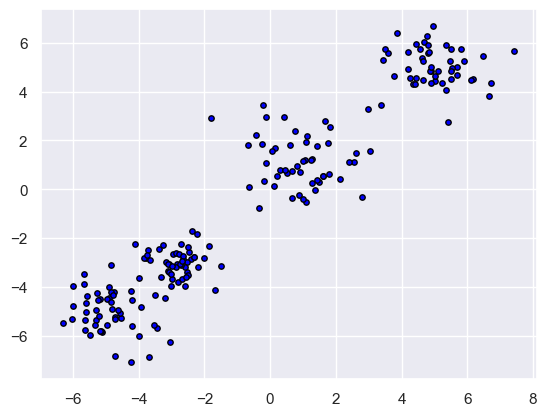

In [2]:
#conjunto de dados, 4 cada um com seu centro definido
centers = [(-5, -5), (-3,-3), (1,1),  (5, 5)]

#o quão esparço os grupos devem ser, quando menor o numero mais proximo os dados estão
cluster_std = [0.9, .6, 1, .8]

#criando base de dados com duas divisões, uma sendo as variaveis explicativas e as variaveis respostas
#no agrupamento não existe rotulo
#base de dados com 200 exemplos
X, y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

#vizualizando os dados com a função scatter
plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', s=15);

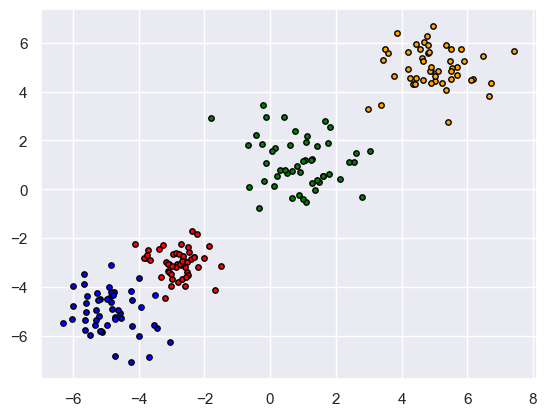

In [3]:
#mostrando o grafico anterior mas agora dividido em cores pra demonstrar sua divisão
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", edgecolors='black', s=15)
plt.scatter(X[y == 3, 0], X[y == 3, 1], color="orange", edgecolors='black', s=15);

In [4]:
#aprendizagem supervisionada
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

In [12]:
#base de teste sobre pinguins
data = pd.read_csv('C:/csv/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [14]:
#manter só dados numericos
X, y = data.dropna().iloc[:, 2:-1], data.dropna().iloc[:, 0] 

X

,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [16]:
#transformando o nome dos pinguins em numeros para analise
le = LabelEncoder()
y_ = le.fit_transform(y)


#treinando modelo com arvore de decisão, x é os dados de entrada e y e os dados alvos
clf = DecisionTreeClassifier().fit(X, y)

In [26]:
#nomes transformados em numeros
y_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

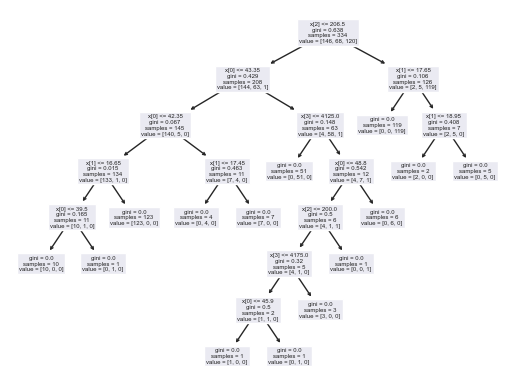

In [17]:
#supervisionado
#resultados das arvores
#após definir variavel é decidido se um numero for maior vai pra um lado se for menor vai para o outro
plot_tree(clf);

In [18]:
from sklearn.tree import export_text

#para vizualisar melhor o exemplo passado vamos usar o export_text para entender
#se o comprimento de asa for menor ou igual 206.5 é analisado a primeira parte, se não a segunda parte de comp_asa_mm
#Exemplo: se o comprimento de asa for maior que 206.5, a largura de bico menor ou igual a 17.65 é um pinguim Gento
#Se a largura do bico foi maior que 17.65 e comprimento  menor ou igual que 18,95 é um adele, se for maior de comprimento que 18,95 é um chinstrap
r = export_text(clf, feature_names=list(X.columns))
print(r)

|--- comp_asa_mm <= 206.50
|   |--- comp_bico_mm <= 43.35
|   |   |--- comp_bico_mm <= 42.35
|   |   |   |--- larg_bico_mm <= 16.65
|   |   |   |   |--- comp_bico_mm <= 39.50
|   |   |   |   |   |--- class: Adelie
|   |   |   |   |--- comp_bico_mm >  39.50
|   |   |   |   |   |--- class: Chinstrap
|   |   |   |--- larg_bico_mm >  16.65
|   |   |   |   |--- class: Adelie
|   |   |--- comp_bico_mm >  42.35
|   |   |   |--- larg_bico_mm <= 17.45
|   |   |   |   |--- class: Chinstrap
|   |   |   |--- larg_bico_mm >  17.45
|   |   |   |   |--- class: Adelie
|   |--- comp_bico_mm >  43.35
|   |   |--- peso_gr <= 4125.00
|   |   |   |--- class: Chinstrap
|   |   |--- peso_gr >  4125.00
|   |   |   |--- comp_bico_mm <= 48.80
|   |   |   |   |--- comp_asa_mm <= 200.00
|   |   |   |   |   |--- peso_gr <= 4175.00
|   |   |   |   |   |   |--- comp_bico_mm <= 45.90
|   |   |   |   |   |   |   |--- class: Adelie
|   |   |   |   |   |   |--- comp_bico_mm >  45.90
|   |   |   |   |   |   |   |--- clas

In [19]:
#aprendizagem não supervisionada
X

,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [20]:
#criando uma variavel para pegar 2 dados: 0 comprimento bico, 2 comprimento asa
X_ = X.iloc[:, [0,2]].values

In [27]:
X_

array([[ 39.1, 181. ],
       [ 39.5, 186. ],
       [ 40.3, 195. ],
       [ 36.7, 193. ],
       [ 39.3, 190. ],
       [ 38.9, 181. ],
       [ 39.2, 195. ],
       [ 41.1, 182. ],
       [ 38.6, 191. ],
       [ 34.6, 198. ],
       [ 36.6, 185. ],
       [ 38.7, 195. ],
       [ 42.5, 197. ],
       [ 34.4, 184. ],
       [ 46. , 194. ],
       [ 37.8, 174. ],
       [ 37.7, 180. ],
       [ 35.9, 189. ],
       [ 38.2, 185. ],
       [ 38.8, 180. ],
       [ 35.3, 187. ],
       [ 40.6, 183. ],
       [ 40.5, 187. ],
       [ 37.9, 172. ],
       [ 40.5, 180. ],
       [ 39.5, 178. ],
       [ 37.2, 178. ],
       [ 39.5, 188. ],
       [ 40.9, 184. ],
       [ 36.4, 195. ],
       [ 39.2, 196. ],
       [ 38.8, 190. ],
       [ 42.2, 180. ],
       [ 37.6, 181. ],
       [ 39.8, 184. ],
       [ 36.5, 182. ],
       [ 40.8, 195. ],
       [ 36. , 186. ],
       [ 44.1, 196. ],
       [ 37. , 185. ],
       [ 39.6, 190. ],
       [ 41.1, 182. ],
       [ 36. , 190. ],
       [ 42

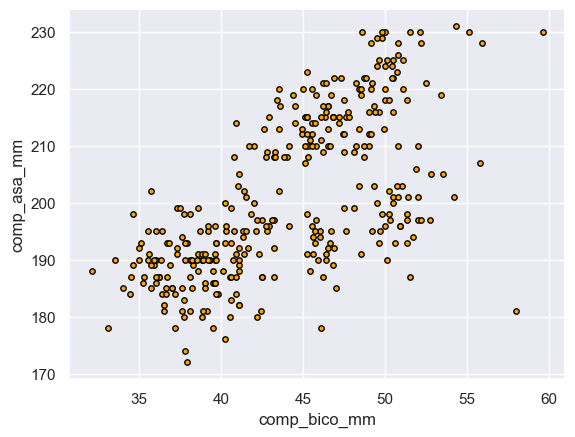

In [21]:
#plotando os dados
plt.scatter(X_[:,0], X_[:, 1], color="orange", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [22]:
#Kmeans algoritmo de agrupamento
from sklearn.cluster import KMeans

In [23]:
#como já é de conhecimento que estamos lidando com 3 especies de pinguim  então vamos dividir em 3 grupos(cluster)
#Kmeans sempre começa de pontos aleatorios
#definir o random_state com um numero para sempre iniciar do msmo ponto para ser possivel replicar o resultado
kmeans = KMeans(n_clusters=3, random_state=3, n_init="auto").fit(X_)
labels = kmeans.labels_

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [28]:
#especies dos pinguins
labels

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

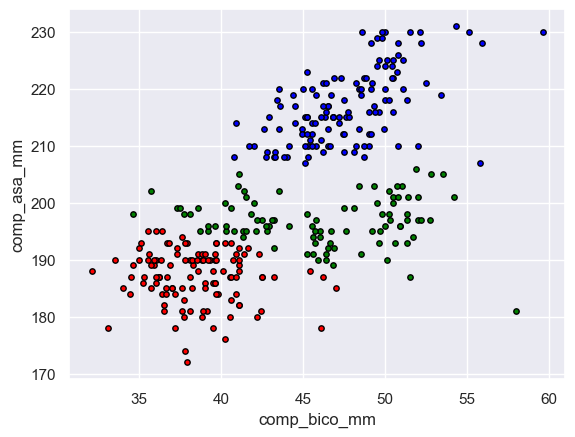

In [24]:
# Resultado Kmeans
#divisão de especies
# não é possivel identificar qual especie é qual grupo por não ter essa informação
#não supervisionado separa os dados pra entender eles e então classificalos de acordo com o necessario
plt.scatter(X_[labels == 0, 0], X_[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(X_[labels == 1, 0], X_[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(X_[labels == 2, 0], X_[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

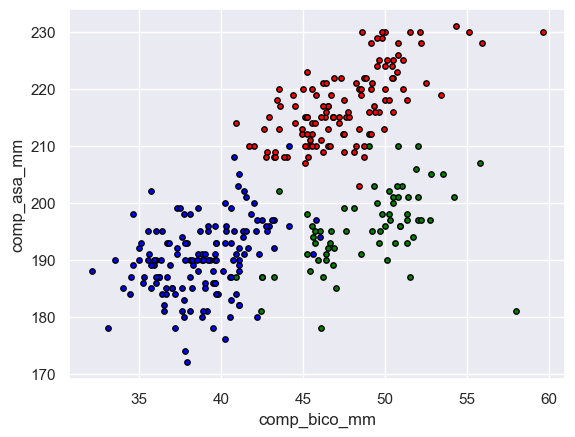

In [25]:
# Aqui é a classificação real de cada grupo, supervisionado
# parecido com anterior mas algumas diferenças dos grupos
#supervisionado é o mapeamento pra encontrar uma resposta
plt.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], color="green", edgecolors='black', s=15)
plt.scatter(X_[y_ == 2, 0], X_[y_ == 2, 1], color="red", edgecolors='black', s=15)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [ ]:
-